In [1]:
import pandas as pd
df = pd.read_csv('./housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


First 10 columns
- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

last column, is the feature that we would like to predict:

- Is the house price above the median or not? (1 for yes and 0 for no)

In [2]:
df.head(10)

dataset = df.values
dataset[:10]


array([[ 8450,     7,     5,   856,     2,     1,     3,     8,     0,
          548,     1],
       [ 9600,     6,     8,  1262,     2,     0,     3,     6,     1,
          460,     1],
       [11250,     7,     5,   920,     2,     1,     3,     6,     1,
          608,     1],
       [ 9550,     7,     5,   756,     1,     0,     3,     7,     1,
          642,     0],
       [14260,     8,     5,  1145,     2,     1,     4,     9,     1,
          836,     1],
       [14115,     5,     5,   796,     1,     1,     1,     5,     0,
          480,     0],
       [10084,     8,     5,  1686,     2,     0,     3,     7,     1,
          636,     1],
       [10382,     7,     6,  1107,     2,     1,     3,     7,     2,
          484,     1],
       [ 6120,     7,     5,   952,     2,     0,     2,     8,     2,
          468,     0],
       [ 7420,     5,     6,   991,     1,     0,     2,     5,     2,
          205,     0]], dtype=int64)


split the dataset into our input features and the label we wish to predict.
X holds the first 10 columns 
Y holds the 10th column

In [3]:
X = dataset[:,0:10]
print ("---- Input features --------\n", X)

Y = dataset[:,10]
print ("----- feature that we wish to predict --------\n", Y)

---- Input features --------
 [[ 8450     7     5 ...     8     0   548]
 [ 9600     6     8 ...     6     1   460]
 [11250     7     5 ...     6     1   608]
 ...
 [ 9042     7     9 ...     9     2   252]
 [ 9717     5     6 ...     5     0   240]
 [ 9937     5     6 ...     6     0   276]]
----- feature that we wish to predict --------
 [1 1 1 ... 1 0 0]


Normalizing our data is very important, as we want the input features to be on the same order of magnitude to
make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [4]:

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

print ("--- scale and normalize data (input features have similar order of magnitude ---\n", X_scale)

--- scale and normalize data (input features have similar order of magnitude ---
 [[0.0334198  0.66666667 0.5        ... 0.5        0.         0.3864598 ]
 [0.03879502 0.55555556 0.875      ... 0.33333333 0.33333333 0.32440056]
 [0.04650728 0.66666667 0.5        ... 0.33333333 0.33333333 0.42877292]
 ...
 [0.03618687 0.66666667 1.         ... 0.58333333 0.66666667 0.17771509]
 [0.03934189 0.44444444 0.625      ... 0.25       0.         0.16925247]
 [0.04037019 0.44444444 0.625      ... 0.33333333 0.         0.19464034]]


Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. 
We use the function train_test_split from scikit-learn to do that.

In [5]:

from sklearn.model_selection import train_test_split

# This tells scikit-learn that your val_and_test size will be 30% of the overall dataset
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

# Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation
# set and test set, we can use the same function to do the split again on val_and_test

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# The code above will split the val_and_test size equally to the validation set and the test set

print ("-- Split dataset into training set, validation set, and test set --\n"),
print ("X_train (10 input features, 70% of full dataset)  = ", X_train.shape)
print ("X_val (10 input features, 15% of full dataset)  = ", X_val.shape)
print ("X_test (10 input features, 15% of full dataset)  = ", X_test.shape)
print ("Y_train (1 label, 70% of full dataset)  = ", Y_train.shape)
print ("Y_val (1 label, 15% of full dataset)  = ", Y_val.shape)
print ("Y_test (1 label, 15% of full dataset)  = ", Y_test.shape)


-- Split dataset into training set, validation set, and test set --

X_train (10 input features, 70% of full dataset)  =  (1022, 10)
X_val (10 input features, 15% of full dataset)  =  (219, 10)
X_test (10 input features, 15% of full dataset)  =  (219, 10)
Y_train (1 label, 70% of full dataset)  =  (1022,)
Y_val (1 label, 15% of full dataset)  =  (219,)
Y_test (1 label, 15% of full dataset)  =  (219,)



This training set has 1022 data points while the validation and test set has 219 data points each. The X
variables have 10 input features, while the Y variables only has one feature to predict.


## Building and training
We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation


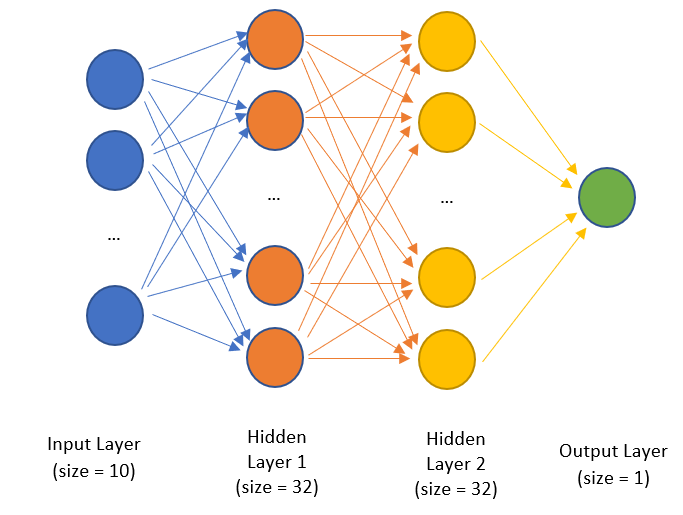

In [7]:
from IPython.display import Image
Image(filename='./ml_architecture.png')


In [8]:
from keras.models import Sequential
from keras.layers import Dense

# Sequential model, means we need to describe the layers above in sequence
#       * first layer as a dense layer with 32 neurons, ReLU activation, and the input shape is 10 since
#       we have 10 input features
#       * second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe
#       the input shape since Keras can infer from the output of our first layer
#       * third layer is a dense layer with 1 neuron, sigmoid activation
#
#  Relu == rectified linear units

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), 
    Dense(32, activation='relu'), 
    Dense(1, activation='sigmoid')
])


## Filling the best numbers
Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by

- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

Configuring the model with these settings requires us to call the function model.compile

In [9]:
# ‘sgd’ refers to stochastic gradient descent
# loss function for outputs that take the values 1 or 0 is called binary cross entropy
# track accuracy on top of the loss function

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Training
Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:

- what data we are training on, which is X_train and Y_train
- the size of our mini-batch
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.
This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [10]:

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6980 - accuracy: 0.4941 - val_loss: 0.6941 - val_accuracy: 0.5342
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5479 - val_loss: 0.6860 - val_accuracy: 0.6210
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.6194 - val_loss: 0.6797 - val_accuracy: 0.6530
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6468 - val_loss: 0.6742 - val_accuracy: 0.6621
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6673 - val_loss: 0.6692 - val_accuracy: 0.6438
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6477 - val_loss: 0.6643 - val_accuracy: 0.6758
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6703 - val_loss: 0.6595 - val_accuracy: 0.6849
Epoch 8/100
3

32/32 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8650 - val_loss: 0.3255 - val_accuracy: 0.8630
Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8689 - val_loss: 0.3226 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8669 - val_loss: 0.3234 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8689 - val_loss: 0.3245 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8640 - val_loss: 0.3195 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8679 - val_loss: 0.3210 - val_accuracy: 0.8676
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8699 - val_loss: 0.3154 - val_accuracy: 0.8721
Epoch 65/100
32/32 

## Evaluate
Evaluating our data on the test set:
index 1 after the model.evaluate() is because the function returns the loss as the first element and the accuracy
as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since
the first element starts its indexing from 0)

In [11]:

loss, accuracy = model.evaluate(X_test, Y_test)
print ("loss ", loss)
print ("accuracy ", accuracy)


7/7 [==============================] - 0s 571us/step - loss: 0.2293 - accuracy: 0.9224
loss  0.22932228446006775
accuracy  0.922374427318573


## Visualizing Loss and Accuracy

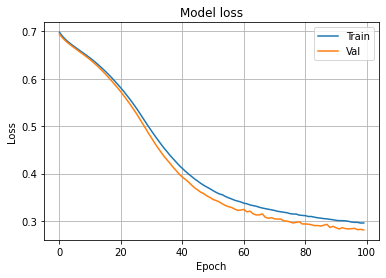

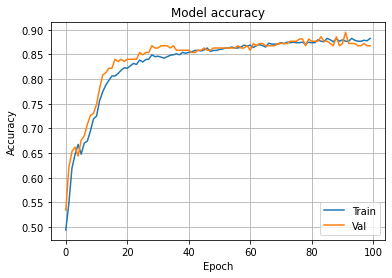

In [12]:

# visualize the training loss and the validation loss like this:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(axis='both')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# visualize the training accuracy and the validation accuracy 

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


## Regularization
train a model which will overfit, which we call Model 2

In [13]:

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5010 - accuracy: 0.7593 - val_loss: 0.3502 - val_accuracy: 0.8950
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3875 - accuracy: 0.8317 - val_loss: 0.3111 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3192 - accuracy: 0.8669 - val_loss: 0.2807 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3000 - accuracy: 0.8718 - val_loss: 0.2687 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2924 - accuracy: 0.8738 - val_loss: 0.3285 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3106 - accuracy: 0.8601 - val_loss: 0.2969 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2721 - accuracy: 0.8875 - val_loss: 0.3468 - val_accuracy: 0.8767
Epoch 

32/32 [==============================] - 1s 21ms/step - loss: 0.1682 - accuracy: 0.9227 - val_loss: 0.2774 - val_accuracy: 0.8813
Epoch 59/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1512 - accuracy: 0.9393 - val_loss: 0.3222 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1606 - accuracy: 0.9325 - val_loss: 0.2485 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1446 - accuracy: 0.9413 - val_loss: 0.3019 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1619 - accuracy: 0.9305 - val_loss: 0.2841 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1611 - accuracy: 0.9286 - val_loss: 0.3356 - val_accuracy: 0.8813
Epoch 64/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1573 - accuracy: 0.9364 - val_loss: 0.2914 - val_accuracy: 0.8904
Epoch 65/100

visualization to see what overfitting looks like in terms of the loss and accuracy.

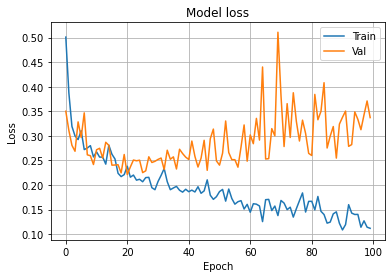

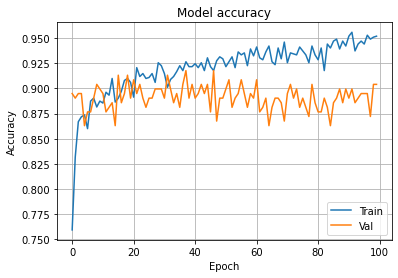

In [14]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.grid()
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()

plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


To address the overfitting seen in Model 2, we'll incorporate L2 regularization and dropout in our
third model here (Model 3).

In [15]:

from keras.layers import Dropout
from keras import regularizers


# This tells Keras to include the squared values of those parameters in our overall loss function, and weight them
# by 0.01 in the loss function.
#   kernel_regularizer=regularizers.l2(0.01)
# This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training
#   Dropout(0.3)


model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 1s 35ms/step - loss: 14.2476 - accuracy: 0.6605 - val_loss: 3.8625 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 1.6999 - accuracy: 0.8268 - val_loss: 0.7827 - val_accuracy: 0.7854
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6101 - accuracy: 0.8434 - val_loss: 0.4999 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.5181 - accuracy: 0.8689 - val_loss: 0.4827 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5644 - accuracy: 0.8307 - val_loss: 0.5724 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5137 - accuracy: 0.8552 - val_loss: 0.4468 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4963 - accuracy: 0.8669 - val_loss: 0.4441 - val_accuracy: 0.8950
Epoch

32/32 [==============================] - 1s 29ms/step - loss: 0.4557 - accuracy: 0.8777 - val_loss: 0.4185 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4471 - accuracy: 0.8718 - val_loss: 0.4013 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4493 - accuracy: 0.8738 - val_loss: 0.4910 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4783 - accuracy: 0.8659 - val_loss: 0.4026 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4532 - accuracy: 0.8699 - val_loss: 0.4440 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4513 - accuracy: 0.8796 - val_loss: 0.3955 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4351 - accuracy: 0.8777 - val_loss: 0.4019 - val_accuracy: 0.8995
Epoch 65/100

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at
the start, and that's because we've changed our loss function. To plot such that the window is zoomed in
between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

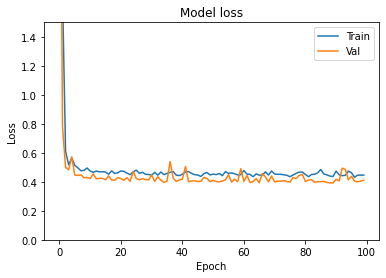

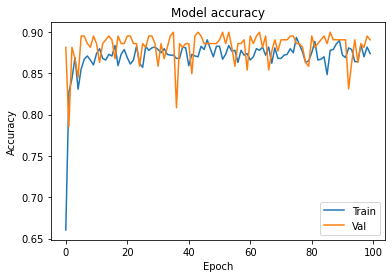

In [16]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.5, bottom=0)
plt.show()


plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
